# LIBRARIES

In [ ]:
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from textblob import TextBlob
from spellchecker import SpellChecker
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.svm import LinearSVC
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
from io import StringIO
import csv
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Embedding, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

nltk.download('punkt')  
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\konst\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\konst\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Cleaning Text Data

In [58]:
review_data = pd.read_csv('ulasan_aplikasi.csv')

In [59]:
review_data.isnull().sum()

Review    0
dtype: int64

In [60]:
review_data.duplicated().sum()
review_data.drop_duplicates(inplace=True)

In [61]:
review_data.head(3)

,Review
0,"Aplikasinya ga praktis, ribet, gerakan tambaha..."
1,Fiture yang perlu di perbaiki. 1. tampilan rut...
2,Gw dari awal narik gojek gak pernah pakai yg n...


In [62]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text) 
    text = re.sub(r'RT[\s]', '', text) 
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text) 
    text = re.sub(r'[^\w\s]', '', text) 
 
    text = text.replace('\n', ' ') 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip(' ') 
    return text

In [63]:
review_data['Review']=review_data['Review'].apply(cleaningText)


In [64]:
review_data.head(3)

,Review
0,Aplikasinya ga praktis ribet gerakan tambahan ...
1,Fiture yang perlu di perbaiki tampilan rute m...
2,Gw dari awal narik gojek gak pernah pakai yg n...


In [65]:
def casefoldingText(text):
    text=text.lower()
    return text
review_data['Review']=review_data['Review'].apply(casefoldingText)

In [66]:
review_data.head(3)

,Review
0,aplikasinya ga praktis ribet gerakan tambahan ...
1,fiture yang perlu di perbaiki tampilan rute m...
2,gw dari awal narik gojek gak pernah pakai yg n...


In [67]:
url = "https://raw.githubusercontent.com/panggi/pujangga/master/resource/formalization/formalizationDict.txt"
response = requests.get(url)

lines = response.text.strip().split('\n')

formal_dict = {}

for line in lines:
    line = line.strip().replace('\ufeff', '')
    if '\t' in line:
        informal, formal = line.split('\t', 1)
        formal_dict[informal.strip()] = formal.strip()

In [68]:
formal_dict.update(
    {'ngak' : 'tidak',
     'narik' : 'ambil',
     'enteng' : 'gampang',
     'fiture ' : 'fitur',
     'kee': 'ke',
     'yg' : 'yang',
     'mantapppp' : 'mantap',
     'gacor' : 'keren',
     'cancel' :'batal',
     'anyeb' : 'jelek',
     'anyep' : 'jelek',
     'eror' : 'salah',
     'order' : 'pesan',
     'aj' :'saja',
     'ajah' : 'saja',
     'aja' : 'saja',
     'ajj' : 'saja',
     'aje' : 'saja',
     'private' : 'pribadi',
     'message' : 'pesan',
     'bonu' : 'bonus',
     'ajh' : 'saja',
     'ajja' : 'saja',
     'mantab' : 'mantap',
     'nya' : '',
     'driver' : '',
     'orderan' : 'pesanan',
     'bagu' : 'bagus',
     'ga' : 'tidak'
     
     }
)

In [69]:
def normalize_slang(text, slang_dict=formal_dict):
    words = text.split()
    normalized = [slang_dict.get(word.lower(), word) for word in words]
    return ' '.join(normalized)

In [70]:
review_data['Review']=review_data['Review'].apply(normalize_slang)

In [71]:
review_data.head(3)

,Review
0,aplikasinya tidak praktis ribet gerakan tambah...
1,fiture yang perlu di perbaiki tampilan rute ma...
2,saya dari awal ambil gojek tidak pernah pakai ...


In [72]:
def tokenize_text(text):
    tokens=nltk.word_tokenize(text)
    return tokens

review_data['Review']=review_data['Review'].apply(tokenize_text)

In [73]:
review_data.head(3)

,Review
0,"[aplikasinya, tidak, praktis, ribet, gerakan, ..."
1,"[fiture, yang, perlu, di, perbaiki, tampilan, ..."
2,"[saya, dari, awal, ambil, gojek, tidak, pernah..."


In [74]:
stop_words=set(stopwords.words('indonesian'))
stop_words.discard('tidak')
def delete_stopwords(text,stop_words=stop_words):
    filtered_words=[word for word in text if word not in stop_words]
    return filtered_words

review_data['Review']=review_data['Review'].apply(delete_stopwords)

In [75]:
review_data.head(3)

,Review
0,"[aplikasinya, tidak, praktis, ribet, gerakan, ..."
1,"[fiture, perbaiki, tampilan, rute, map, jaman,..."
2,"[ambil, gojek, tidak, pakai, nama, aplikasi, t..."


In [76]:
def merge_list(text):
    sentences=" ".join(text)
    return sentences
review_data['preprocessed_Review']=review_data['Review'].apply(merge_list)

In [302]:
def preprocessed_text(text):
    a=cleaningText(text)
    b=casefoldingText(a)
    c=normalize_slang(b)
    d=tokenize_text(c)
    e=delete_stopwords(d)
    f=merge_list(e)
    return f

# Labelling Data

In [77]:
review_data

,Review,preprocessed_Review
0,"[aplikasinya, tidak, praktis, ribet, gerakan, ...",aplikasinya tidak praktis ribet gerakan tambah...
1,"[fiture, perbaiki, tampilan, rute, map, jaman,...",fiture perbaiki tampilan rute map jaman majapa...
2,"[ambil, gojek, tidak, pakai, nama, aplikasi, t...",ambil gojek tidak pakai nama aplikasi tambahan...
3,"[tidak, batal, penumpang, notif, terdeteksi, p...",tidak batal penumpang notif terdeteksi pembata...
4,"[tolong, perbaiki, sistem, sistem, tidak, tida...",tolong perbaiki sistem sistem tidak tidak masu...
...,...,...
130490,[mantap],mantap
130492,[mantap],mantap
130493,"[enak, gampang]",enak gampang
130496,[mbambet],mbambet


In [78]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [79]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
 
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
 
    score = 0
    # Inisialisasi skor sentimen ke 0
 
    for word in text:
        # Mengulangi setiap kata dalam teks
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
 
    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
 
    polarity=''
    # Inisialisasi variabel polaritas
 
    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
    #Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan
 
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [80]:
results = review_data['Review'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
review_data['polarity_score'] = results[0]
review_data['polarity'] = results[1]
print(review_data['polarity'].value_counts())

polarity
negative    75160
positive    23501
neutral     16374
Name: count, dtype: int64


In [81]:
sentiment_counts=review_data['polarity'].value_counts()

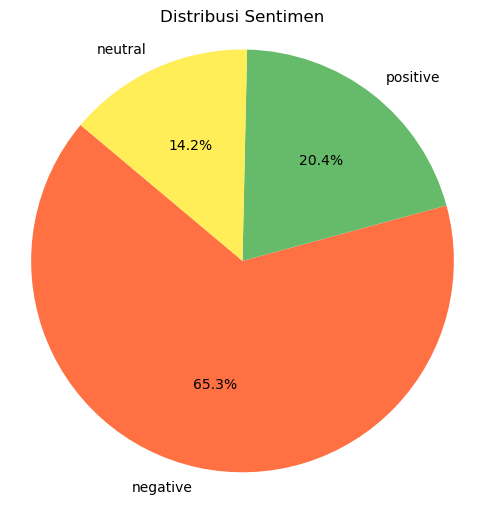

In [82]:
# Warna opsional
colors = ['#ff7043','#66bb6a', '#ffee58']  # green, red, yellow (positive, negative, neutral)

# Buat plot
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Distribusi Sentimen')
plt.axis('equal')  # Biar bulat, bukan oval
plt.show()

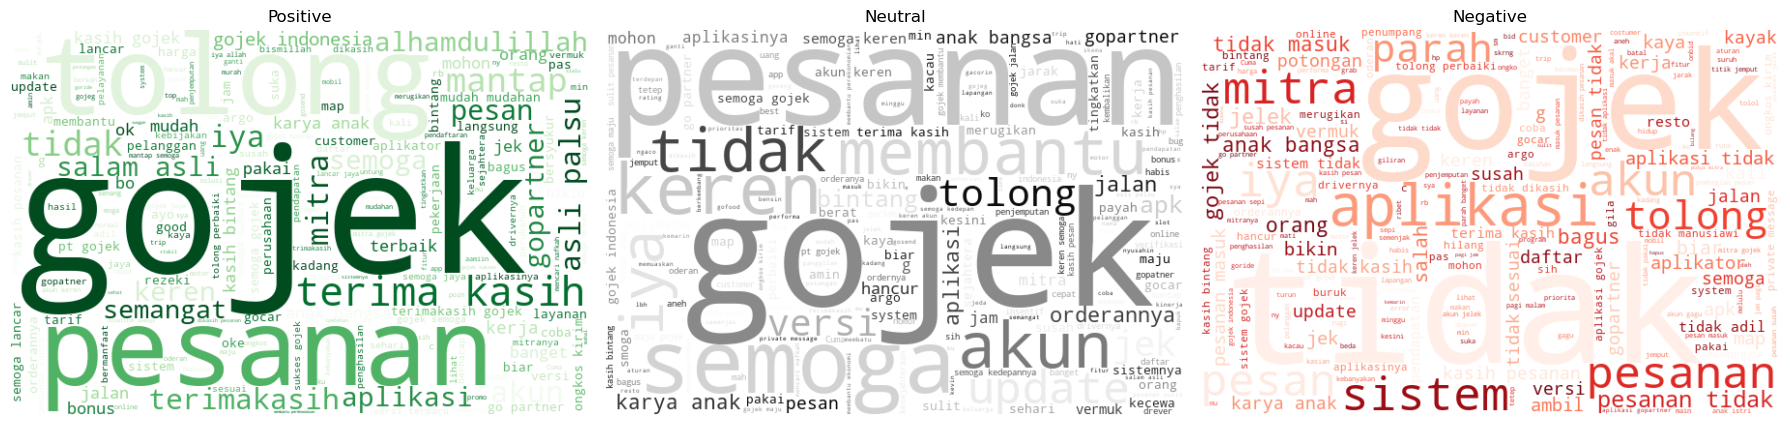

In [83]:
# Filter teks berdasarkan sentimen
text_pos = ' '.join(review_data[review_data['polarity'] == 'positive']['preprocessed_Review'])
text_neu = ' '.join(review_data[review_data['polarity'] == 'neutral']['preprocessed_Review'])
text_neg = ' '.join(review_data[review_data['polarity'] == 'negative']['preprocessed_Review'])

# Buat WordCloud-nya
wc_pos = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(text_pos)
wc_neu = WordCloud(width=600, height=400, background_color='white', colormap='gray').generate(text_neu)
wc_neg = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(text_neg)

# Plot dalam subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(wc_pos, interpolation='bilinear')
axs[0].set_title('Positive')
axs[0].axis('off')

axs[1].imshow(wc_neu, interpolation='bilinear')
axs[1].set_title('Neutral')
axs[1].axis('off')

axs[2].imshow(wc_neg, interpolation='bilinear')
axs[2].set_title('Negative')
axs[2].axis('off')

plt.tight_layout()
plt.show()


# Preprocessing and Modelling

## Implementasi Model ML Klasik
- Logistic Regression + TFIDF + 70/30
- SVC Linear + TFIDF + 80/20
- SVC Linear + CountVectorizer + 70/30

In [84]:
X = review_data['preprocessed_Review']
y = review_data['polarity']
 
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=5000, min_df=2, max_df=0.8,ngram_range=(1,3) )
X_tfidf = tfidf.fit_transform(X)
# Ekstraksi fitur CountVectorizer
vectorizer = CountVectorizer(
    max_features=5000,     
    ngram_range=(1, 3),    
    min_df=2,              
    max_df=0.8           
)
X_bow = vectorizer.fit_transform(X)
 
# Split Data
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_svc2, X_test_svc2, y_train_svc2, y_test_svc2 = train_test_split(X_bow, y, test_size=0.3, random_state=42)

In [85]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_logreg.toarray(), y_train_logreg)

y_pred_train_lr = logreg.predict(X_train_logreg.toarray())
y_pred_test_lr = logreg.predict(X_test_logreg.toarray())

print("Logistic Regression + TFIDF + 70/30 - accuracy_train:", accuracy_score(y_train_logreg, y_pred_train_lr))
print("Logistic Regression + TFIDF + 70/30 - accuracy_test:", accuracy_score(y_test_logreg, y_pred_test_lr))
scores_logreg = cross_val_score(logreg, X_tfidf, y, cv=5, scoring='accuracy')
print(f'Rata rata akurasi CV 5 fold : {np.mean(scores_logreg)}')

Logistic Regression + TFIDF + 70/30 - accuracy_train: 0.9506979285678804
Logistic Regression + TFIDF + 70/30 - accuracy_test: 0.9369476398829358
Rata rata akurasi CV 5 fold : 0.9285174077454688


In [86]:
svm = LinearSVC()
svm.fit(X_train_svc.toarray(), y_train_svc)

y_pred_train_svm = svm.predict(X_train_svc.toarray())
y_pred_test_svm = svm.predict(X_test_svc.toarray())

print("SVC + TFIDF + 80/20 - accuracy_train:", accuracy_score(y_train_svc, y_pred_train_svm))
print("SVC + TFIDF + 80/20 - accuracy_test:", accuracy_score(y_test_svc, y_pred_test_svm))
scores_svc_tfidf = cross_val_score(svm, X_tfidf, y, cv=5, scoring='accuracy')
print(f'Rata rata akurasi CV 5 fold SVC + TFIDF: {np.mean(scores_svc_tfidf)}')

SVC + TFIDF + 80/20 - accuracy_train: 0.9632829138957708
SVC + TFIDF + 80/20 - accuracy_test: 0.9468857304298691
Rata rata akurasi CV 5 fold SVC + TFIDF: 0.9404876776633199


In [87]:
svm2 = LinearSVC()
svm2.fit(X_train_svc2.toarray(), y_train_svc2)

y_pred_train_svm = svm.predict(X_train_svc2.toarray())
y_pred_test_svm = svm.predict(X_test_svc2.toarray())

print("SVC + CountVectorizer + 70/30 - accuracy_train:", accuracy_score(y_train_svc2, y_pred_train_svm))
print("SVC + CountVectorizer + 70/30 - accuracy_test:", accuracy_score(y_test_svc2, y_pred_test_svm))
scores_svc_bow = cross_val_score(svm2, X_bow, y, cv=5, scoring='accuracy')
print(f'Rata rata akurasi CV 5 fold SVC + CountVectorizer: {np.mean(scores_svc_bow)}')

SVC + CountVectorizer + 70/30 - accuracy_train: 0.933336644975411
SVC + CountVectorizer + 70/30 - accuracy_test: 0.9261974442931239
Rata rata akurasi CV 5 fold SVC + CountVectorizer: 0.9379058547398618


## Implementasi Deep Learning GRU

In [299]:
import pickle
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [273]:
sequences = tokenizer.texts_to_sequences(X)

In [274]:
maxlen = 100
X_gru = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [275]:
X_gru

array([[ 104,    2, 3069, ...,    0,    0,    0],
       [5324,   42,  469, ...,    0,    0,    0],
       [  39,    4,    2, ...,    0,    0,    0],
       ...,
       [ 161,  450,    0, ...,    0,    0,    0],
       [2063,    0,    0, ...,    0,    0,    0],
       [3899,    0,    0, ...,    0,    0,    0]])

In [276]:
label_map = {"negative": 0, "neutral": 1, "positive": 2}
labels = [label_map[l] for l in y]

In [277]:
y_gru = to_categorical(labels, num_classes=3)

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X_gru, y_gru, test_size=0.2, random_state=42)

In [279]:
vocab_size = 10000 
embedding_dim = 256
maxlen = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    Bidirectional(GRU(64, return_sequences=False)), 
    Dropout(0.6),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.6),
    Dense(3, activation='softmax')
])


In [280]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
early_stopping = EarlyStopping(
    monitor='val_loss',      
    patience=1,             
    restore_best_weights=True,
    verbose=1
)
lr_reduction = ReduceLROnPlateau(monitor='val_loss',  # monitor validation loss
                                  patience=1,         # number of epochs with no improvement
                                  factor=0.5,         # reduce LR by a factor of 0.5
                                  min_lr=1e-6,        # minimum learning rate
                                  verbose=1)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [281]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stopping])

Epoch 1/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 262s 361ms/step - accuracy: 0.8164 - loss: 0.7292 - val_accuracy: 0.9494 - val_loss: 0.1707
Epoch 2/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 255s 354ms/step - accuracy: 0.9588 - loss: 0.1504 - val_accuracy: 0.9521 - val_loss: 0.1586
Epoch 3/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 250s 348ms/step - accuracy: 0.9698 - loss: 0.1109 - val_accuracy: 0.9562 - val_loss: 0.1519
Epoch 4/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 272s 378ms/step - accuracy: 0.9743 - loss: 0.0934 - val_accuracy: 0.9559 - val_loss: 0.1741
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 3.


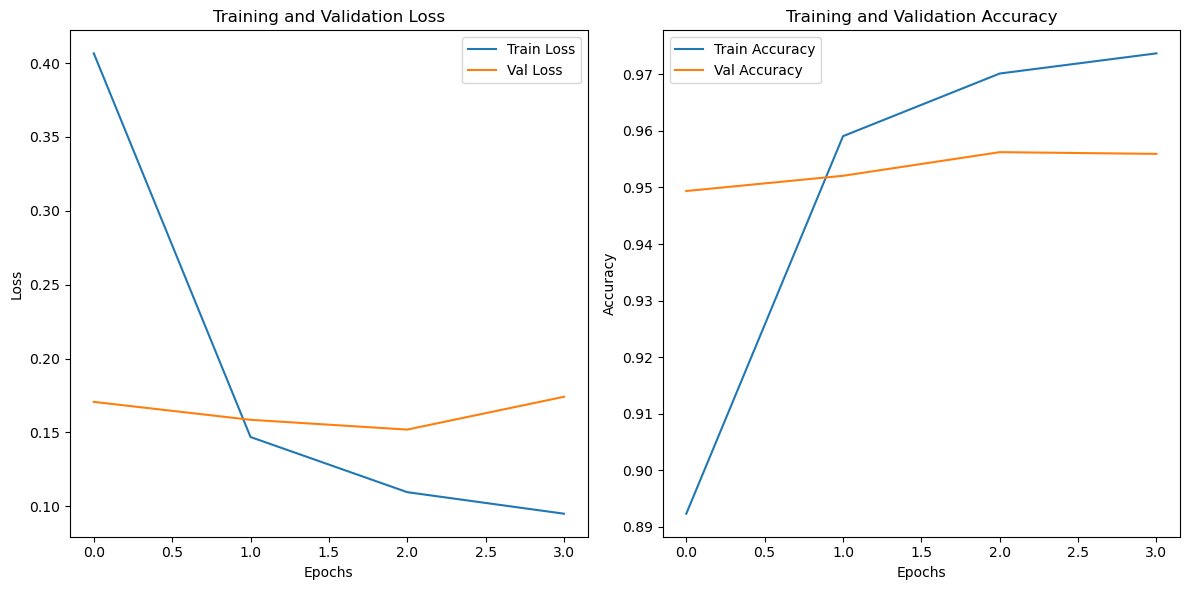

In [282]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [284]:
y_pred_gru=model.predict(X_test)

719/719 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step


In [286]:
y_pred_gru_class=y_pred_gru.argmax(axis=1)

In [292]:
y_pred_gru_class

array([2, 0, 2, ..., 0, 0, 2], dtype=int64)

In [295]:
y_test_class=np.argmax(y_test,axis=1)

In [296]:
y_test_class

array([2, 0, 2, ..., 0, 0, 2], dtype=int64)

In [ ]:
report = classification_report(y_test_class, y_pred_gru_class, target_names=['negatif', 'netral', 'positif'])
print(report)

              precision    recall  f1-score   support

     negatif       0.98      0.98      0.98     15116
      netral       0.94      0.84      0.89      3187
     positif       0.90      0.96      0.93      4704

    accuracy                           0.96     23007
   macro avg       0.94      0.93      0.93     23007
weighted avg       0.96      0.96      0.96     23007



In [298]:
model.save('model_sentimen_gojekdriver.h5')